# SEMANA 12 - SESIÓN 45 - LAB Evaluación de Modelos de Aprendizaje Supervisado

# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [8]:
# Your code here:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['MEDV'])  # Variables predictoras
y = data['MEDV']  # Variable de respuesta 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [9]:
# Your code here:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

## 3. Calculate and print R-squared for both the training and the testing set.

In [11]:
# Your code here:
# Ajustar el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Realizar las predicciones sobre el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Calcular la puntuación R^2
r2_score_test = modelo_regresion.score(X_test, y_test)
r2_score_train = modelo_regresion.score(X_train, y_train)
# Imprimir la puntuación R^2
print(f'Puntuación R^2 del modelo test: {r2_score_test}')
print(f'Puntuación R^2 del modelo train: {r2_score_train}')

Puntuación R^2 del modelo test: 0.6687594935356307
Puntuación R^2 del modelo train: 0.7508856358979673


## 4. Calculate and print mean squared error for both the training and the testing set.

In [12]:
# Your code here:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# mse = mean_squared_error(y_train, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [13]:
# Your code here:
from sklearn.metrics import mean_absolute_error
# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

# Mostrar el MAE
print(f"Mean Absolute Error del modelo: {mae:.2f}")

Mean Absolute Error del modelo: 3.19


## Classification Model Evaluation

In [14]:
from sklearn.datasets import load_iris
data = load_iris()

In [15]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
column_names = data.feature_names

In [17]:
df = pd.DataFrame(data['data'],columns=column_names)

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
target = pd.DataFrame(data.target)

In [20]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [22]:
# Your code here:
# Cargar datos y dividir en entrenamiento y prueba
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [23]:
# Your code here:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo de regresión logística
modelo = LogisticRegression(max_iter=10000)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Mostrar las probabilidades predichas
probabilidades = modelo.predict_proba(X_test)
print("\nProbabilidades de las clases (0, 1):\n", probabilidades)

Accuracy: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Probabilidades de las clases (0, 1):
 [[3.80451428e-03 8.27740653e-01 1.68454833e-01]
 [9.46981194e-01 5.30186076e-02 1.98739195e-07]
 [8.86460303e-09 1.54857733e-03 9.98451414e-01]
 [6.48690078e-03 7.92228033e-01 2.01285066e-01]
 [1.45813479e-03 7.74129008e-01 2.24412858e-01]
 [9.55904925e-01 4.40948987e-02 1.76030460e-07]
 [7.80260385e-02 9.07691011e-01 1.42829509e-02]
 [1.63933053e-04 1.54554476e-01 8.45281591e-01]
 [2.22425494e-03 7.62853132e-01 2.34922613e-01]
 [2.84434358e-02 9.45731991e-01 2.58245735e-02]

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [20]:
# Your code here :

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [21]:
# Your code here :

## 10. Calculate and print the precision score for both the training and the testing set.

In [22]:
# Your code here :

## 11. Calculate and print the recall score for both the training and the testing set.

In [23]:
# Your code here :

## 12. Calculate and print the F1 score for both the training and the testing set.

In [24]:
# Your code here :

## 13. Generate confusion matrices for both the training and the testing set.

In [25]:
# Your code here :

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

Reporte de clasificación: Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Reporte de clasificación: Decision Tree Classifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

    Logistic Regression  Decision Tree Classifier
0                   1.0                  0.833333
1                   1.0                  

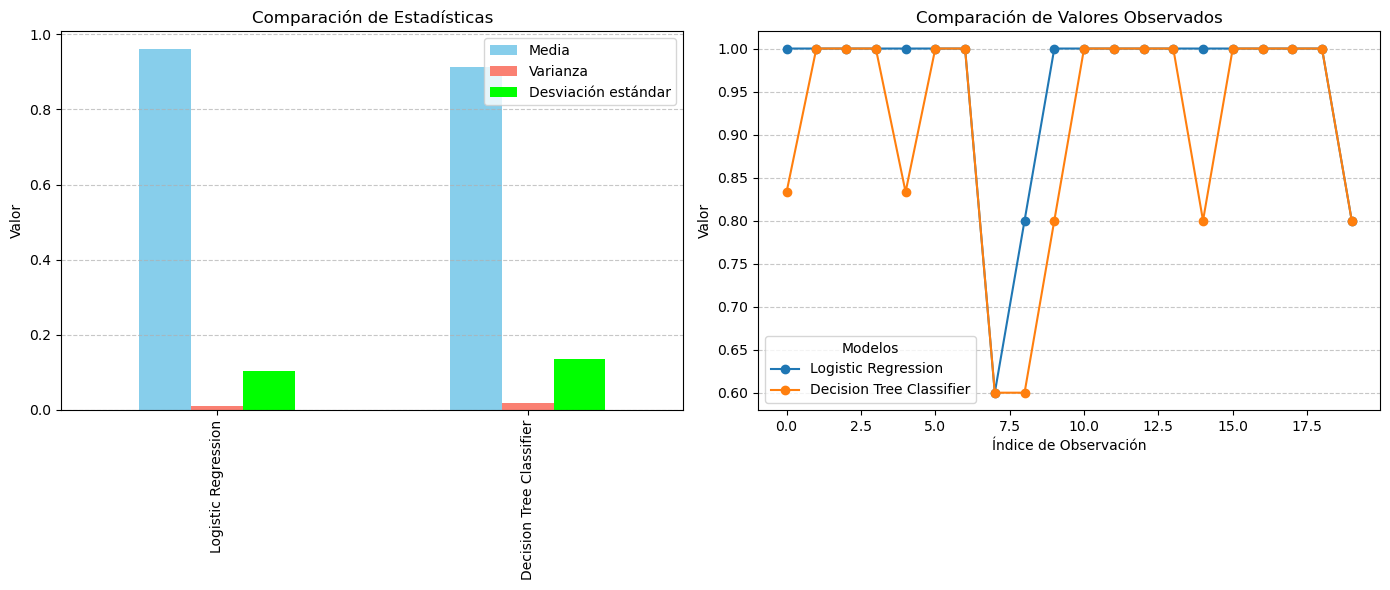

In [24]:
# Have fun here!
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np 

# 1. Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Variables independientes (características)
y = iris.target  # Variable dependiente (tipo de flor)

# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Entrenar un modelo de Regresión Logística
model1 = LogisticRegression(max_iter=200)
model2 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

model_pipeline = [model1, model2]
model_names = ['Logistic Regression', 'Decision Tree Classifier']
scores = {}
cross_val = {}
i=0

# 4. Hacer predicciones


for model in model_pipeline:
    y_pred = model.predict(X_test)
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=20))
    cross_val[model_names[i]] = cross_val_score(model, X_train, y_train, cv=20)
    scores[model_names[i]] = mean_score
    print(f"Reporte de clasificación: {model_names[i]}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    i = i+1

df = pd.DataFrame(cross_val)
print(df)
# 5. Evaluar el modelo
resultados = pd.DataFrame({
    'Media': df.mean(),
    'Varianza': df.var(),
    'Desviación estándar': df.std()
})
print(resultados)


# Estadísticas descriptivas
stats = pd.DataFrame({
    'Media': df.mean(),
    'Varianza': df.var(),
    'Desviación estándar': df.std()
})

# Gráfico de barras para comparar estadísticas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
stats.plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon', 'lime'])
ax[0].set_title('Comparación de Estadísticas')
ax[0].set_ylabel('Valor')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de líneas para comparar valores observados
df.plot(ax=ax[1], marker='o')
ax[1].set_title('Comparación de Valores Observados')
ax[1].set_ylabel('Valor')
ax[1].set_xlabel('Índice de Observación')
ax[1].legend(title='Modelos')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráficos
plt.tight_layout()
plt.show()